The aim is to classify a telecommunication customer. We will use K-NN classifier to predict the customer segement.

In [4]:
import pandas as pd

#### Import data

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
print('Data downloaded!')    

--2019-02-05 13:02:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.01s   

2019-02-05 13:02:28 (2.46 MB/s) - 'teleCust1000t.csv' saved [37048/37048]

Data downloaded!


#### Load data from CSV

In [6]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### Extract the features and target variable  

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values 
y = df['custcat'].values

#### Normalize data  
It is important to normalize data before applying KNN since it uses the distances (Eucledian) to classify the unknown data.

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#### Train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state = 4)

#### Build KNN classifyer

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k=6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

#### Predict

In [16]:
yhat = neigh.predict(X_test)

#### Evaluate accuracy

In [18]:
from sklearn import metrics
print("Train set accuracy: {}".format(metrics.accuracy_score(y_train, neigh.predict(X_train))))
print("Test set accuracy: {}".format(metrics.accuracy_score(y_test, neigh.predict(X_test))))

Train set accuracy: 0.51625
Test set accuracy: 0.31


#### Optimize the model by selecting a K value that results in highest accuracy   
Jaccard similarity index or F1-score can be used for evaluation

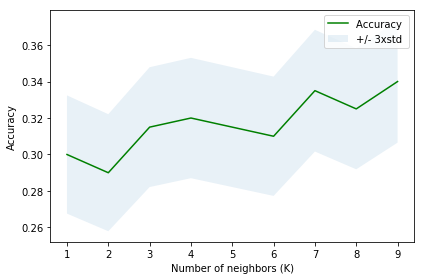

The highest accuracy is 0.34 for K= 9


In [36]:
import numpy as np
import matplotlib.pyplot as plt
Ks = 10
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)
# ConfusionMx =[]
for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
#     mean_acc[n-1] = metrics.jaccard_similarity_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# Plot model accuracy for different number of neighbors:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()
print('The highest accuracy is {} for K= {}'.format(max(mean_acc), np.argmax(mean_acc)+1))


Note how accuracy is low and as a result KNN does not perfrom a nice job of classifying the customers.